In [27]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Загрузка датасета
df = pd.read_csv('train.csv')

In [29]:
# 1. Преобразование строковых значений дат в тип datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Добавляем столбец с годом
df['Year'] = df['Order Date'].dt.year

# Добавляем столбец с YYYY-MM (год-месяц)
df['Month'] = df['Order Date'].dt.strftime('%Y-%m')

In [30]:
# 2. Проверка пропущенных значений
print("Пропущенные значения:\n", df.isnull().sum())

Пропущенные значения:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Year              0
Month             0
dtype: int64


In [31]:
# 3. Заполнение пропущенных значений (если необходимо)
# Например, заполним пропущенные значения в 'Postal Code' средним значением

df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mean())

# Ранее, при использовании методов вроде .fillna(), Pandas мог автоматически "понижать" тип данных (downcast) до более подходящего, но в будущем это будет изменено.
# Чтобы убрать это предупреждение, можно вручную преобразовать тип данных столбца после применения метода .fillna(). Вот как это можно сделать:
# Заполнить пропуски.
# Явно преобразовать тип данных с помощью .infer_objects().

df['Postal Code'] = df['Postal Code'].infer_objects(copy=False)

In [23]:
# 4. Описание статистики по продажам
print(df['Sales'].describe())

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64


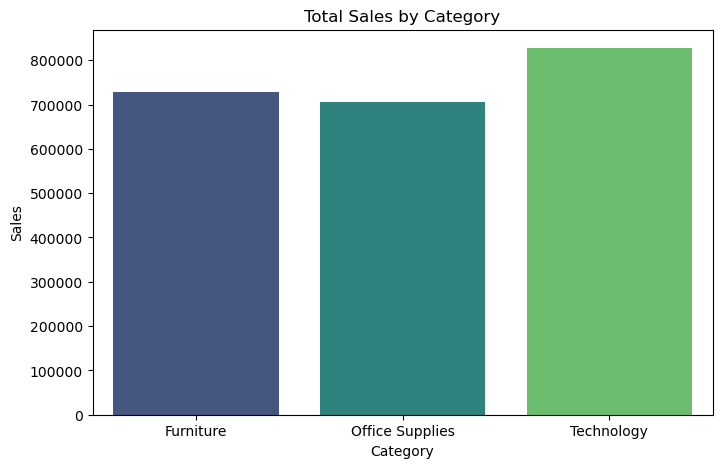

In [24]:
# 5. Анализ по категориям
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Визуализация продаж по категориям
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Sales', data=category_sales, palette='viridis', hue='Category')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

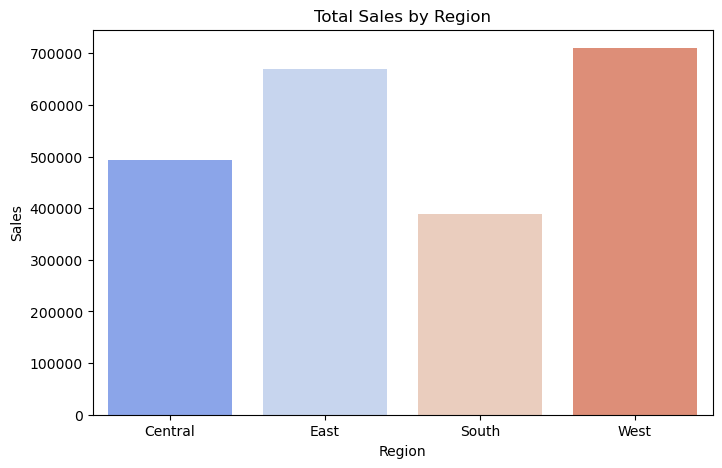

In [25]:
# 6. Анализ продаж по регионам
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Визуализация продаж по регионам
plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Sales', data=region_sales, palette='coolwarm', hue='Region')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

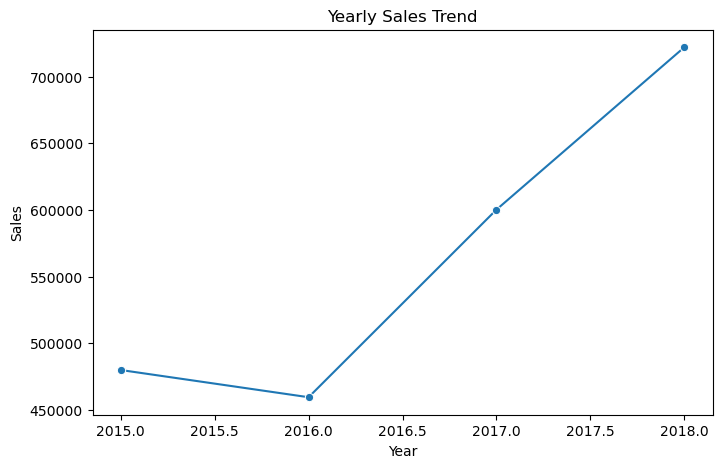

In [26]:
# 7. Анализ продаж по времени (по годам)
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Визуализация годовых продаж
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Sales', data=yearly_sales, marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

# Анализ данных в табличном виде

In [44]:
# 1. Сводная таблица: Суммарные продажи по категориям продуктов
pivot_category = pd.pivot_table(df, values='Sales', index='Category', aggfunc='sum').round(0)
print("Суммарные продажи по категориям продуктов:")
pivot_category

Суммарные продажи по категориям продуктов:


,Sales
Category,
Furniture,728659.0
Office Supplies,705422.0
Technology,827456.0


In [45]:
# 2. Сводная таблица: Средние продажи по регионам
pivot_region = pd.pivot_table(df, values='Sales', index='Region', aggfunc='mean').round(0)
print("\nСредние продажи по регионам:")
pivot_region


Средние продажи по регионам:


,Sales
Region,
Central,216.0
East,240.0
South,244.0
West,226.0


In [46]:
# 3. Сводная таблица: Суммарные продажи по годам и категориям
pivot_year_category = pd.pivot_table(df, values='Sales', index='Year', columns='Category', aggfunc='sum').round(0)
print("\nСуммарные продажи по годам и категориям:\n")
pivot_year_category


Суммарные продажи по годам и категориям:



Category,Furniture,Office Supplies,Technology
Year,,,
2015,156478.0,149513.0,173866.0
2016,164054.0,133124.0,162258.0
2017,195813.0,182418.0,221962.0
2018,212314.0,240368.0,269371.0


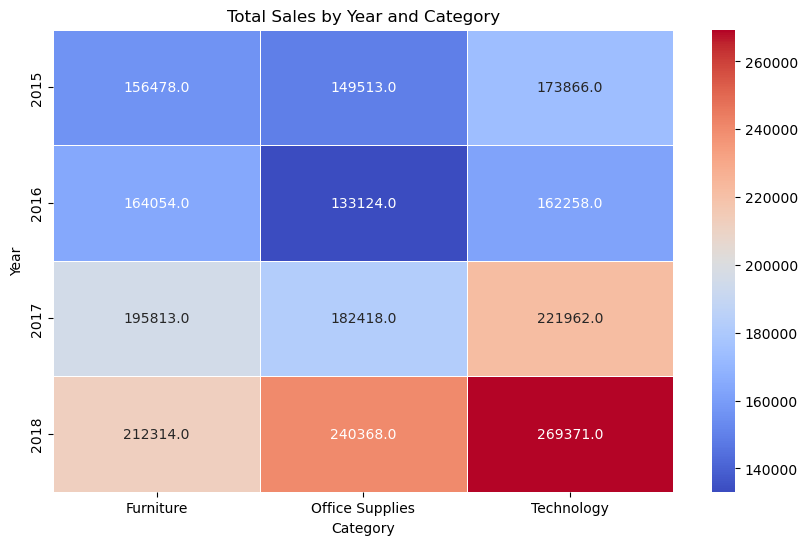

In [51]:
# Построение тепловой карты на основе сводной таблицы
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_year_category, annot=True, cmap='coolwarm', linewidths=.5, fmt=".1f")
plt.title('Суммарные продажи по годам и категориям')
plt.show()

In [47]:
# 4. Сводная таблица: Суммарные продажи по сегментам и регионам
pivot_segment_region = pd.pivot_table(df, values='Sales', index='Segment', columns='Region', aggfunc='sum').round(0)
print("\nСуммарные продажи по сегментам и регионам:\n")
pivot_segment_region


Суммарные продажи по сегментам и регионам:



Region,Central,East,South,West
Segment,,,,
Consumer,250211.0,347907.0,194702.0,355241.0
Corporate,152031.0,195897.0,120547.0,220018.0
Home Office,90405.0,125715.0,73902.0,134960.0


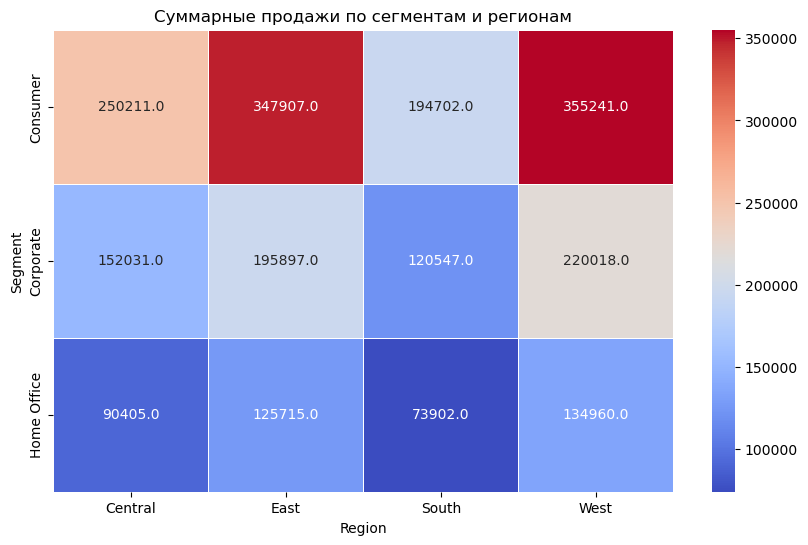

In [52]:
# Построение тепловой карты на основе сводной таблицы
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_segment_region, annot=True, cmap='coolwarm', linewidths=.5, fmt=".1f")
plt.title('Суммарные продажи по сегментам и регионам')
plt.show()

In [49]:
# 5. Сводная таблица: Количество заказов по способам доставки
pivot_ship_mode = pd.pivot_table(df, values='Order ID', index='Ship Mode', aggfunc='count')
print("\nКоличество заказов по способам доставки:\n")
pivot_ship_mode


Количество заказов по способам доставки:



,Order ID
Ship Mode,
First Class,1501
Same Day,538
Second Class,1902
Standard Class,5859


# Доля продаж по региону и сегменту от общего объема продаж (в %)

In [60]:
# Суммарные продажи по региону и сегменту
sales_region_segment = pd.pivot_table(df, values='Sales', index='Region', columns='Segment', aggfunc='sum', margins=True, margins_name='Total')

# Общий объем продаж (Total Sales)
total_sales = df['Sales'].sum()

# Рассчет доли продаж по региону и сегменту
sales_region_segment_percentage = (sales_region_segment / total_sales) * 100

# Округляем до сотых
sales_region_segment_percentage = sales_region_segment_percentage.round(2)

# Вывод таблицы с долей продаж
sales_region_segment_percentage

Segment,Consumer,Corporate,Home Office,Total
Region,,,,
Central,11.06,6.72,4.00,21.78
East,15.38,8.66,5.56,29.60
South,8.61,5.33,3.27,17.21
West,15.71,9.73,5.97,31.40
Total,50.76,30.44,18.79,100.00


In [61]:
sales_region_segment_percentage.to_excel('./output/sales_region_segment_percentage.xlsx')